In [7]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

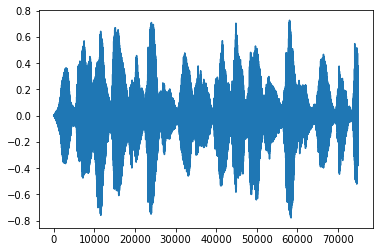

In [35]:
signal, sample_rate = librosa.load("../datasets/violin/A-Participant01_Kreutzer_Step1_detache_take_01.wav")
signal = signal[25000:100000]
plt.plot(signal)

In [31]:
from scipy.signal.windows import hann
signal_pts = len(signal)
N = int(0.025*sample_rate)
h = int(0.002*sample_rate)
window = hann(N)

In [32]:
def tone_envelope(x, N, h):
    energy = []
    w = hann(N)
    i = 0
    while i*h+N < len(x):
        e = 0
        for n in range(N):
            e += (x[i*h+n]*w[n])**2
        energy.append(e)
        i+=1
    return 20*np.log(np.array(energy))


In [36]:
env = tone_envelope(signal, N, h)

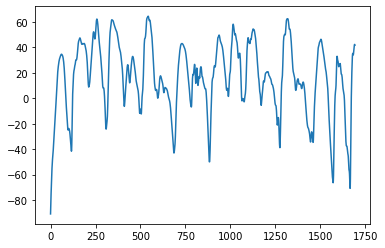

In [37]:
plt.plot(env)

In [39]:
dyn_range = 35
constrained_env = env*(env>(np.max(env)-dyn_range))

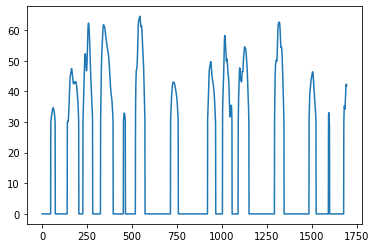

In [40]:
plt.plot(constrained_env)

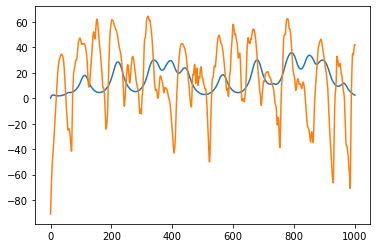

In [64]:
from scipy.signal import butter, sosfilt
sos = butter(1, 100, btype='low', analog=False, output='sos', fs=sample_rate)
filtered = sosfilt(sos, constrained_env)
filtered_2 = sosfilt(sos, filtered)
bw_filtered = sosfilt(sos, np.flip(filtered))
bw_filtered_2 = np.flip(sosfilt(sos, bw_filtered))
plt.plot(np.linspace(0,1000, len(bw_filtered)), bw_filtered)
plt.plot(np.linspace(0,1000, len(env)), env)

In [69]:
zc = librosa.zero_crossings(env-bw_filtered)*30

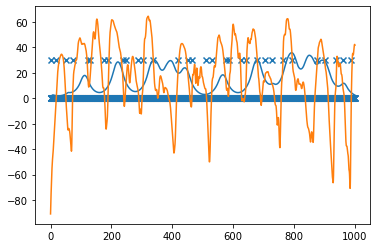

In [81]:
plt.plot(np.linspace(0,1000, len(bw_filtered)), bw_filtered)
plt.plot(np.linspace(0,1000, len(env)), env)
plt.scatter(np.linspace(0,1000, len(zc)), zc, marker='x')

In [84]:
def 

1693

In [90]:
len(signal)/sample_rate

3.401360544217687

22050